In [1]:
import pandas as pd
import numpy as np

Download data about compressive strength of concrete based on its ingredients

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concrete_data.shape

(1030, 9)

Check data integrity

In [7]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Split data into predictors and target

In [9]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

Verify predictors and target

In [10]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [11]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Normalize the predictors -> subtract the mean, divide by the standard deviation

In [12]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Store the number of predictors for building the network

In [13]:
n_cols = predictors_norm.shape[1] # number of predictors

Import Keras and prepare to build the regression model

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# define regression model with two hidden layers with 50 nodes each
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,))) # first layer must match number of inputs
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1)) # One output value

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [18]:
model = regression_model()

In [19]:
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100

23/23 - 4s - loss: 1586.4467 - val_loss: 1093.6431 - 4s/epoch - 178ms/step
Epoch 2/100
23/23 - 0s - loss: 1382.0337 - val_loss: 919.5306 - 329ms/epoch - 14ms/step
Epoch 3/100
23/23 - 0s - loss: 1068.3540 - val_loss: 673.0673 - 174ms/epoch - 8ms/step
Epoch 4/100
23/23 - 0s - loss: 679.4890 - val_loss: 405.5703 - 187ms/epoch - 8ms/step
Epoch 5/100
23/23 - 0s - loss: 367.4471 - val_loss: 232.3905 - 197ms/epoch - 9ms/step
Epoch 6/100
23/23 - 0s - loss: 251.6569 - val_loss: 177.0081 - 184ms/epoch - 8ms/step
Epoch 7/100
23/23 - 0s - loss: 227.5939 - val_loss: 166.9810 - 216ms/epoch - 9ms/step
Epoch 8/100
23/23 - 0s - loss: 213.4156 - val_loss: 161.3563 - 232ms/epoch - 10ms/step
Epoch 9/100
23/23 - 0s - loss: 202.9639 - val_loss: 161.1449 - 188ms/epoch - 8ms/step
Epoch 10/100
23/23 - 0s - loss: 195.1931 - val_loss: 154.9832 - 189ms/epoch - 8ms/step
Epoch 11/100
23/23 - 0s - loss: 187.3442 - val_loss: 154.5451 - 180ms/epoch - 8ms/step
Epoch 12/100
23/23 - 0s - loss: 181.9993 - val

Plot loss per epoch

In [20]:
import matplotlib.pyplot as plt

In [21]:
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=200, verbose=0)

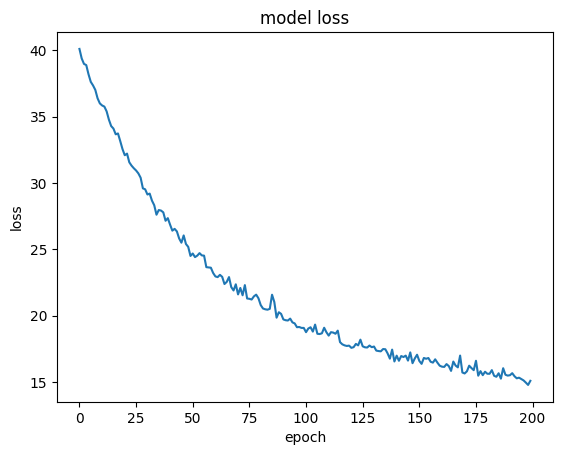

In [23]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()